In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_excel("ama_rev.xlsx")

In [3]:
df

,Unnamed: 0,Rating,Reveiw
0,0,4,"At this budget, it’s surely a go-to-device! Po..."
1,1,1,Wrong charger in the box.
2,2,5,The only high configuration laptop under this ...
3,3,1,Lap top was blast .. you can see the video att...
4,4,4,High Performance packed in a sleek & thin body
...,...,...,...
16709,16709,5,Good product
16710,16710,5,Good Innovation
16711,16711,5,"Seamless , liked multiple volt option. It's do..."
16712,16712,5,No business disrruption


In [4]:
df = df.drop(['Unnamed: 0'], axis=1)

In [5]:
df.isnull().sum()

Rating    0
Reveiw    0
dtype: int64

We can see that we don't have any null values in the dataset. 

In [6]:
df['Rating'].value_counts()

5    7225
1    4683
4    2694
3    1291
2     821
Name: Rating, dtype: int64

We can see that we have 5 rating and their counts in the dataset. 

<AxesSubplot:xlabel='Rating', ylabel='count'>

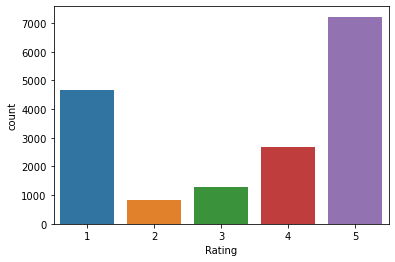

In [7]:
sns.countplot(df['Rating'])

In [8]:
df["Reveiw"].value_counts()

Good                                229
Value for money                     156
Good product                        101
Awesome                              65
Nice                                 61
                                   ... 
Good quality.                         1
Cameras??                             1
Return request not solved             1
Budget Friendly..                     1
Descent Monitor as per the price      1
Name: Reveiw, Length: 8989, dtype: int64

In [10]:
from NLP import NLP
nlp = NLP()

In [11]:
nlp.training("Reveiw")

R
Positive/Negative(1?0):0
e
Positive/Negative(1?0):0
v
Positive/Negative(1?0):1
e
Positive/Negative(1?0):1
i
Positive/Negative(1?0):0
w
Positive/Negative(1?0):1


In [12]:
nlp.getModel()

In [13]:
df.head(5)

,Rating,Reveiw
0,4,"At this budget, it’s surely a go-to-device! Po..."
1,1,Wrong charger in the box.
2,5,The only high configuration laptop under this ...
3,1,Lap top was blast .. you can see the video att...
4,4,High Performance packed in a sleek & thin body


In [14]:
df.shape

(16714, 2)

In [15]:
wine

NameError: name 'wine' is not defined

In [16]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [17]:
label = LabelEncoder()
df["Reveiw"] = label.fit_transform(df["Reveiw"])

In [18]:
df["Reveiw"].head()

0     513
1    8444
2    7208
3    4421
4    3815
Name: Reveiw, dtype: int32

In [19]:
x = df["Reveiw"]
y = df["Rating"]

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor  
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [21]:
dtc = DecisionTreeRegressor()
lr = LinearRegression()
svr = SVR()
rnd = RandomForestRegressor()
knn = KNeighborsRegressor()

In [22]:
model = [lr,dtc,svr,rnd,knn]

In [23]:
random_state = []
def predict_best_state(X):
    for i in range(0,200):
        x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = i)
        X.fit(x_train,y_train)
        predict_train = X.predict(x_train)
        predict_test = X.predict(x_test)
        if round(r2_score(y_train,predict_train)*100,1) == round(r2_score(y_test,predict_test)*100,1):
            print("AT random state",i,"the",X,"model is performing good")
            random_state.append(i)

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.20, random_state = 42)

In [25]:
dtc.fit(x_train,y_train)
lr.fit(x_train,y_train)
svr.fit(x_train,y_train)
knn.fit(x_train,y_train)
rnd.fit(x_train,y_train)

ValueError: Expected 2D array, got 1D array instead:
array=[1466. 8676. 7565. ... 4948.   72. 8082.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.